# Using LittleVGG for Emotion Detection

### Training Emotion Detector

In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import os

num_classes = 7
img_rows, img_cols = 48, 48
batch_size = 16

train_data_dir = './train'
validation_data_dir = './validation'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      width_shift_range=0.4,
      height_shift_range=0.4,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


## Our Keras Imports

In [2]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D
from keras.layers import ELU
from keras.layers import Activation, Flatten, Dropout, Dense

## Keras LittleVGG Model

In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer="he_normal",
                 input_shape = (img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding = "same", kernel_initializer="he_normal", 
                 input_shape = (img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #2: second CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #3: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #4: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #5: first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #6: second set of FC => RELU layers
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #7: softmax classifier
model.add(Dense(num_classes, kernel_initializer="he_normal"))
model.add(Activation("softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                       

## Training our model

In [4]:
# from keras.optimizers import RMSprop, SGD, Adam
# from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# import tensorflow as tf

                     
# checkpoint = ModelCheckpoint("./save_model/emotion_little_vgg_3.h5",
#                              monitor="val_loss",
#                              mode="min",
#                              save_best_only = True,
#                              verbose=1)

# earlystop = EarlyStopping(monitor = 'val_loss', 
#                           min_delta = 0, 
#                           patience = 3,
#                           verbose = 1,
#                           restore_best_weights = True)

# reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

# # we put our call backs into a callback list
# callbacks = [earlystop, checkpoint, reduce_lr]

# # We use a very small learning rate 
# model.compile(loss = 'categorical_crossentropy',
#               optimizer = Adam(lr=0.001),
#               metrics = ['accuracy'])

# nb_train_samples = 28273
# nb_validation_samples = 3534
# epochs = 1

# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch = nb_train_samples // batch_size,
#     epochs = epochs,
#     callbacks = callbacks,
#     validation_data = validation_generator,
#     validation_steps = nb_validation_samples // batch_size)

Found 3589 images belonging to 7 classes.
225/225 [==============================] - 4s 17ms/step
Confusion Matrix
[[  0   0   0   0   1   0 490]
 [  0   0   0   0   0   0  55]
 [  0   0   0   0   0   2 526]
 [  2   0   0   0   1   0 876]
 [  3   0   0   0   1   1 621]
 [  2   0   0   0   2   1 589]
 [  4   0   0   0   1   0 411]]
Classification Report
              precision    recall  f1-score   support

       Angry       0.00      0.00      0.00       491
     Disgust       0.00      0.00      0.00        55
        Fear       0.00      0.00      0.00       528
       Happy       0.00      0.00      0.00       879
     Neutral       0.17      0.00      0.00       626
         Sad       0.25      0.00      0.00       594
    Surprise       0.12      0.99      0.21       416

    accuracy                           0.12      3589
   macro avg       0.08      0.14      0.03      3589
weighted avg       0.08      0.12      0.03      3589



/Users/ttcenter/Downloads/DeepLearningCV/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ttcenter/Downloads/DeepLearningCV/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ttcenter/Downloads/DeepLearningCV/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

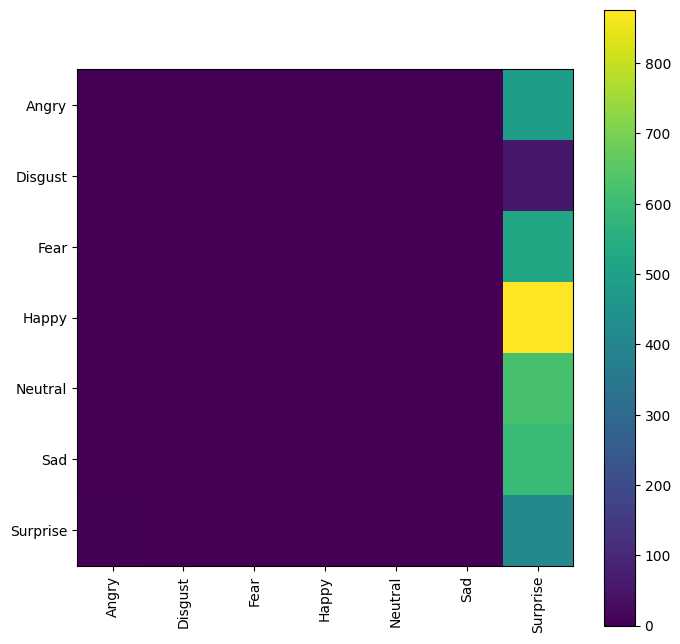

In [4]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

nb_train_samples = 28273
nb_validation_samples = 3534

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

### Loading our saved model

In [7]:
from keras.models import load_model

classifier = load_model('./save_model/emotion_little_vgg_3.h5')

Found 3589 images belonging to 7 classes.
225/225 [==============================] - 4s 17ms/step
Confusion Matrix
[[  0   0   7 421  14   0  49]
 [  0   0   0  51   1   0   3]
 [  0   0   2 424  14   0  88]
 [  0   0   6 786  27   0  60]
 [  0   0   4 529  22   0  71]
 [  0   0   5 532  29   0  28]
 [  0   0   5 267   7   0 137]]
Classification Report
              precision    recall  f1-score   support

       Angry       0.00      0.00      0.00       491
     Disgust       0.00      0.00      0.00        55
        Fear       0.07      0.00      0.01       528
       Happy       0.26      0.89      0.40       879
     Neutral       0.19      0.04      0.06       626
         Sad       0.00      0.00      0.00       594
    Surprise       0.31      0.33      0.32       416

    accuracy                           0.26      3589
   macro avg       0.12      0.18      0.11      3589
weighted avg       0.14      0.26      0.15      3589



/Users/ttcenter/Downloads/DeepLearningCV/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ttcenter/Downloads/DeepLearningCV/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ttcenter/Downloads/DeepLearningCV/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

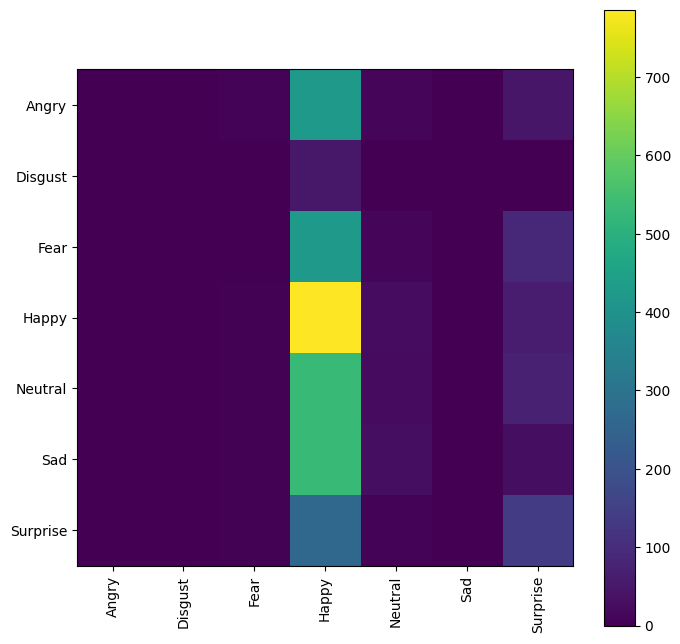

In [8]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

nb_train_samples = 28273
nb_validation_samples = 3534

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = classifier.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

### Get our class labels

In [8]:
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)

Found 3589 images belonging to 7 classes.
{0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}


### Let's test on some of validation images

In [9]:
# from keras.models import load_model
# from keras.optimizers import RMSprop, SGD, Adam
# from keras.preprocessing import image
# import numpy as np
# import os
# import cv2
# import numpy as np
# from os import listdir
# from os.path import isfile, join
# import re

# def draw_test(name, pred, im, true_label):
#     BLACK = [0,0,0]
#     expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
#     cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
#     cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
#     cv2.imshow(name, expanded_image)


# def getRandomImage(path, img_width, img_height):
#     """function loads a random images from a random folder in our test path """
#     folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
#     random_directory = np.random.randint(0,len(folders))
#     path_class = folders[random_directory]
#     file_path = path + path_class
#     file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
#     random_file_index = np.random.randint(0,len(file_names))
#     image_name = file_names[random_file_index]
#     final_path = file_path + "/" + image_name
#     return image.load_img(final_path, target_size = (img_width, img_height),grayscale=True), final_path, path_class

# # dimensions of our images
# img_width, img_height = 48, 48

# # We use a very small learning rate 
# model.compile(loss = 'categorical_crossentropy',
#               optimizer = RMSprop(lr = 0.001),
#               metrics = ['accuracy'])

# files = []
# predictions = []
# true_labels = []

# # Sửa trong vòng lặp dự đoán
# for i in range(0, 10):
#     path = './validation/' 
#     img, final_path, true_label = getRandomImage(path, img_width, img_height)
#     files.append(final_path)
#     true_labels.append(true_label)
#     x = image.img_to_array(img)
#     x = x * 1./255
#     x = np.expand_dims(x, axis=0)
#     images = np.vstack([x])
#     classes = model.predict(images, batch_size=10)
#     predicted_class_index = np.argmax(classes, axis=1)[0]  # Lấy chỉ số lớp
#     predictions.append(predicted_class_index)

# # Sửa trong vòng lặp hiển thị
# for i in range(0, len(files)):
#     image = cv2.imread((files[i]))
#     image = cv2.resize(image, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
#     predicted_label = class_labels[predictions[i]]  # Lấy nhãn từ chỉ số lớp
#     draw_test("Prediction", predicted_label, image, true_labels[i])
#     cv2.waitKey(0)

# cv2.destroyAllWindows()


### Test on a single image

In [10]:
# from keras.models import load_model
# from keras.preprocessing import image
# import numpy as np
# import os
# import cv2
# import numpy as np
# from os import listdir
# from os.path import isfile, join
# from keras.preprocessing.image import img_to_array

# face_classifier = cv2.CascadeClassifier('./Haarcascades/haarcascade_frontalface_default.xml')

# def face_detector(img):
#     # Convert image to grayscale
#     gray = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY)
#     faces = face_classifier.detectMultiScale(gray, 1.3, 5)
#     if faces is ():
#         return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
#     allfaces = []   
#     rects = []
#     for (x,y,w,h) in faces:
#         cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_gray = cv2.resize(roi_gray, (48, 48), interpolation = cv2.INTER_AREA)
#         allfaces.append(roi_gray)
#         rects.append((x,w,y,h))
#     return rects, allfaces, img

# img = cv2.imread("rajeev.jpg")
# rects, faces, image = face_detector(img)

# i = 0
# for face in faces:
#     roi = face.astype("float") / 255.0
#     roi = img_to_array(roi)
#     roi = np.expand_dims(roi, axis=0)

#     # make a prediction on the ROI, then lookup the class
#     preds = classifier.predict(roi)[0]
#     label = class_labels[preds.argmax()]   

#     #Overlay our detected emotion on our pic
#     label_position = (rects[i][0] + int((rects[i][1]/2)), abs(rects[i][2] - 10))
#     i =+ 1
#     cv2.putText(image, label, label_position , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    
# cv2.imshow("Emotion Detector", image)
# cv2.waitKey(0)

# cv2.destroyAllWindows()

### Let's try this on our webcam


In [ ]:
import cv2
import numpy as np
from time import sleep
from keras.preprocessing.image import img_to_array

face_classifier = cv2.CascadeClassifier('./Haarcascades/haarcascade_frontalface_default.xml')

def face_detector(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]

    try:
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation = cv2.INTER_AREA)
    except:
        return (x,w,y,h), np.zeros((48,48), np.uint8), img
    return (x,w,y,h), roi_gray, img

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    rect, face, image = face_detector(frame)
    if np.sum([face]) != 0.0:
        roi = face.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)

        # make a prediction on the ROI, then lookup the class
        preds = classifier.predict(roi)[0]
        label = class_labels[preds.argmax()]  
        label_position = (rect[0] + int((rect[1]/2)), rect[2] + 25)
        cv2.putText(image, label, label_position , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
    else:
        cv2.putText(image, "No Face Found", (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
        
    cv2.imshow('All', image)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      

<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/6g/w95x1v0d1x35fpsv9_hkm7ww0000gn/T/ipykernel_55768/1099583068.py:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


1/1 [==============================] - 0s 11ms/step


In [16]:
cap.release()
cv2.destroyAllWindows()      